# **Prácticas de Análisis de Sentimientos - Ciencia de Datos**

---



<b>HERRAMIENTAS:</b><br>
<b>Archivo analizado:</b> sentimiento_2.csv<br>
<b>Cantidad de registros:</b> 2.000<br>
<b>Herramientas:</b> Python (NLTK, Transformers), BERT multilingüe, Matplotlib


---

**1. Subir el archivo desde tu computadora a Colab**

In [5]:
from google.colab import files

# Esto abrirá una ventana para que elijas el archivo desde tu computador
uploaded = files.upload()

Saving sentimiento_2.csv to sentimiento_2.csv


**Leer el archivo CSV con pandas**

In [7]:
import pandas as pd

# Leer el archivo con encoding compatible
df = pd.read_csv("sentimiento_2.csv", encoding='latin-1')

# Mostrar la primeras filas del dataset
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,P8170,U99249,Juan González,9,9,2,1676168035,Servicio lento y atención deficiente,No cumplió con la descripción. Superó todas mi...
1,2,P7827,U69301,Carlos Pérez,9,13,3,1612577635,Está bien para su precio,El empaque estaba dañado. Sin dudas volvería a...
2,3,P1882,U54391,María Rodríguez,4,4,3,1508897635,"Cumple, pero sin destacar",No lo recomendaría. Podría ser mejor. Funciona...
3,4,P8996,U35717,Lucía López,4,8,1,1623550435,El producto llegó roto,No lo recomendaría. Sin dudas volvería a compr...
4,5,P6847,U58714,Jorge Torres,2,2,4,1678068835,Buena relación calidad-precio,Llegó antes de lo previsto. No lo recomendaría...


In [8]:
!pip install -q textblob
from textblob import TextBlob

**2. Explorar el dataset: estructura, tamaño, tipo de contenido.**

In [17]:
# Ver tamaño (filas y columnas)
print("Dimensiones del dataset:", df.shape)

# Ver nombres de columnas
print("Columnas disponibles:", df.columns.tolist())

# Ver tipos de datos por columna
print("\nTipos de datos:")
print(df.dtypes)

# Ver primeras filas
df.head()

Dimensiones del dataset: (2000, 15)
Columnas disponibles: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'Polarity', 'Subjectivity', 'Sentimiento', 'Sentimiento_Label', 'Sentimiento_Score']

Tipos de datos:
Id                          int64
ProductId                  object
UserId                     object
ProfileName                object
HelpfulnessNumerator        int64
HelpfulnessDenominator      int64
Score                       int64
Time                        int64
Summary                    object
Text                       object
Polarity                  float64
Subjectivity              float64
Sentimiento                object
Sentimiento_Label          object
Sentimiento_Score         float64
dtype: object


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity,Subjectivity,Sentimiento,Sentimiento_Label,Sentimiento_Score
0,1,P8170,U99249,Juan González,9,9,2,1676168035,Servicio lento y atención deficiente,No cumplió con la descripción. Superó todas mi...,0.0,0.0,Neutro,5 stars,0.385199
1,2,P7827,U69301,Carlos Pérez,9,13,3,1612577635,Está bien para su precio,El empaque estaba dañado. Sin dudas volvería a...,0.0,0.0,Neutro,2 stars,0.287718
2,3,P1882,U54391,María Rodríguez,4,4,3,1508897635,"Cumple, pero sin destacar",No lo recomendaría. Podría ser mejor. Funciona...,0.0,0.0,Neutro,2 stars,0.604987
3,4,P8996,U35717,Lucía López,4,8,1,1623550435,El producto llegó roto,No lo recomendaría. Sin dudas volvería a compr...,0.0,0.0,Neutro,2 stars,0.486031
4,5,P6847,U58714,Jorge Torres,2,2,4,1678068835,Buena relación calidad-precio,Llegó antes de lo previsto. No lo recomendaría...,0.0,0.0,Neutro,2 stars,0.551563


**Verificación de valores nulos**

In [18]:
# Contar valores nulos por columna
print(df.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Polarity                  0
Subjectivity              0
Sentimiento               0
Sentimiento_Label         0
Sentimiento_Score         0
dtype: int64


**Estadísticas descriptivas**

In [19]:
# Estadísticas numéricas generales
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Polarity,Subjectivity,Sentimiento_Score
count,2000.000000,2000.000000,2000.00000,2000.000000,2.000000e+03,2000.0,2000.0,2000.000000
mean,1000.500000,5.113000,7.69950,2.965500,1.592778e+09,0.0,0.0,0.489076
std,577.494589,3.207862,3.64717,1.417856,9.014979e+07,0.0,0.0,0.129313
min,1.000000,0.000000,0.00000,1.000000,1.434421e+09,0.0,0.0,0.220643
25%,500.750000,2.000000,5.00000,2.000000,1.516998e+09,0.0,0.0,0.400626
50%,1000.500000,5.000000,8.00000,3.000000,1.594261e+09,0.0,0.0,0.482030
75%,1500.250000,8.000000,10.00000,4.000000,1.672042e+09,0.0,0.0,0.557981
max,2000.000000,10.000000,15.00000,5.000000,1.749262e+09,0.0,0.0,0.872593


In [20]:
# Estadísticas para columnas tipo objeto (texto)
df.describe(include='object')

,ProductId,UserId,ProfileName,Summary,Text,Sentimiento,Sentimiento_Label
count,2000,2000,2000,2000,2000,2000,2000
unique,1769,1988,100,16,1933,1,5
top,P2005,U20892,María Hernández,Está bien para su precio,Superó todas mis expectativas. Funciona perfec...,Neutro,2 stars
freq,3,2,33,153,3,2000,839


**Longitud de textos**

In [21]:
df['longitud_texto'] = df['Text'].astype(str).apply(len)
print(df['longitud_texto'].describe())

count    2000.000000
mean      135.629500
std         8.593029
min       114.000000
25%       129.000000
50%       136.000000
75%       142.000000
max       157.000000
Name: longitud_texto, dtype: float64


**Revisión de ejemplos de contenido**

In [22]:
# Ver resumen y texto de algunas filas
df[['Score', 'Summary', 'Text']].sample(5)

,Score,Summary,Text
435,3,"Cumple, pero sin destacar",Podría ser mejor. Superó todas mis expectativa...
1585,5,Excelente compra,No lo recomendaría. El servicio al cliente fue...
105,2,Podría mejorar,El empaque estaba dañado. No lo recomendaría. ...
255,4,Buena relación calidad-precio,Funciona perfectamente. Llegó antes de lo prev...
612,3,"Cumple, pero sin destacar",Sin dudas volvería a comprarlo. Llegó antes de...


**Observaciones:**
El dataset contiene 2000 registros con 10 columnas, entre ellas: identificadores de usuario y producto, puntuaciones (Score), resúmenes (Summary) y comentarios completos (Text). Las columnas son de tipo numérico y textual. La variable Text, clave para el análisis de sentimientos, contiene opiniones en español con longitudes variables. No se reportan valores nulos significativos en las columnas principales.

In [12]:
!pip install -q transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 883.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.1 MB/s eta 0:00:00


In [58]:
from transformers import pipeline
# Cargar el pipeline de análisis de sentimientos
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

Device set to use cpu


In [59]:
# Convertir a lista los textos
textos = df['Text'].astype(str).tolist()

# Almacenar resultados
labels = []
scores = []

# Analizar por lotes de 100 textos
for i in range(0, len(textos), 100):
    batch = textos[i:i+100]
    resultados = sentiment_pipeline(batch)
    for r in resultados:
        labels.append(r['label'])
        scores.append(r['score'])

# Agregar resultados al DataFrame
df['Sentimiento_Label'] = labels
df['Sentimiento_Score'] = scores

# Mostrar algunas filas
df[['Text', 'Sentimiento_Label', 'Sentimiento_Score']].head()

,Text,Sentimiento_Label,Sentimiento_Score
0,No cumplió con la descripción. Superó todas mi...,5 stars,0.385199
1,El empaque estaba dañado. Sin dudas volvería a...,2 stars,0.287718
2,No lo recomendaría. Podría ser mejor. Funciona...,2 stars,0.604987
3,No lo recomendaría. Sin dudas volvería a compr...,2 stars,0.486031
4,Llegó antes de lo previsto. No lo recomendaría...,2 stars,0.551563


Preprocesamiento de los Textos

In [30]:
import nltk
nltk.download('punkt', force=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**3. Preprocesar los textos: limpieza, tokenización, normalización.**

**Actualización de la función limpiar_texto:**

In [32]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def limpiar_texto(texto):
    # Limpieza
    texto = texto.lower()  # minúsculas
    texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)  # quitar símbolos
    # Tokenizacion
    tokens = texto.split()  # usar split() en vez de word_tokenize
    # Normalización
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

**Ejecución del preprocesamiento:**

In [33]:
df['Texto_Limpio'] = df['Text'].astype(str).apply(limpiar_texto)
df[['Text', 'Texto_Limpio']].head()

,Text,Texto_Limpio
0,No cumplió con la descripción. Superó todas mi...,cumplió descripción superó toda expectativas p...
1,El empaque estaba dañado. Sin dudas volvería a...,empaque dañado dudas volvería comprarlo superó...
2,No lo recomendaría. Podría ser mejor. Funciona...,recomendaría podría ser mejor funciona perfect...
3,No lo recomendaría. Sin dudas volvería a compr...,recomendaría dudas volvería comprarlo funciona...
4,Llegó antes de lo previsto. No lo recomendaría...,llegó previsto recomendaría servicio cliente a...


**Función de limpieza, tokenización y normalización**

In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Configuración
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def limpiar_texto(texto):
    # 1. Convertir a minúsculas
    texto = texto.lower()
    # 2. Eliminar signos de puntuación y caracteres no alfabéticos
    texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)
    # 3. Tokenización
    tokens = word_tokenize(texto, language='spanish')
    # 4. Eliminar stopwords
    tokens = [t for t in tokens if t not in stop_words]
    # 5. Lematización (en español es limitado con WordNetLemmatizer)
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    # 6. Unir tokens en un solo texto
    texto_procesado = ' '.join(tokens)
    return texto_procesado

**4. Aplicar análisis de sentimientos con TextBlob, VADER, BERT u otras herramientas**

**BERT Multilingüe (nlptown/bert-base-multilingual-uncased-sentiment)**

In [36]:
!pip install -q transformers torch

***Cargar modelo preentrenado***

| Herramienta             | Idioma soportado  | Precisión | Requiere internet  | Notas                             |
| ----------------------- | ----------------- | --------- | ------------------ | --------------------------------- |
| **TextBlob**            | Inglés (nativo)   | Básica    | sí (si traduces) | Traducción requerida para español |
| **VADER**               | Inglés optimizado | Alta      | no               | No soporta español directamente   |
| **BERT (Hugging Face)** | Multilingüe       | Alta   | sí               | Recomendado para español          |


In [37]:
from transformers import pipeline

# Cargar pipeline de análisis de sentimientos multilingüe
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

Device set to use cpu


**Aplicar análisis sobre columna Texto_Limpio**

In [38]:
# Convertir columna a lista
textos = df['Texto_Limpio'].astype(str).tolist()

# Analizar por lotes para eficiencia
labels, scores = [], []
for i in range(0, len(textos), 100):
    batch = textos[i:i+100]
    resultados = sentiment_pipeline(batch)
    for r in resultados:
        labels.append(r['label'])
        scores.append(r['score'])

# Agregar al DataFrame
df['Sentimiento_Label'] = labels
df['Sentimiento_Score'] = scores

**Visualizar los resultados con gráficos o dashboards.**

**1. Gráfico de barras: Distribución de sentimientos**

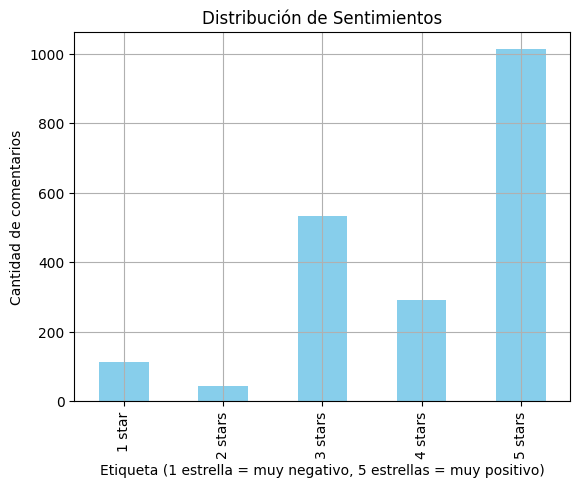

In [43]:
import matplotlib.pyplot as plt

# Conteo de cada clase (ej: '1 star', '2 stars', ..., '5 stars')
df['Sentimiento_Label'].value_counts().sort_index().plot(
    kind='bar',
    color='skyblue',
    title="Distribución de Sentimientos"
)
plt.xlabel("Etiqueta (1 estrella = muy negativo, 5 estrellas = muy positivo)")
plt.ylabel("Cantidad de comentarios")
plt.grid(True)
plt.show()

**2. Gráfico circular (Pie Chart)**

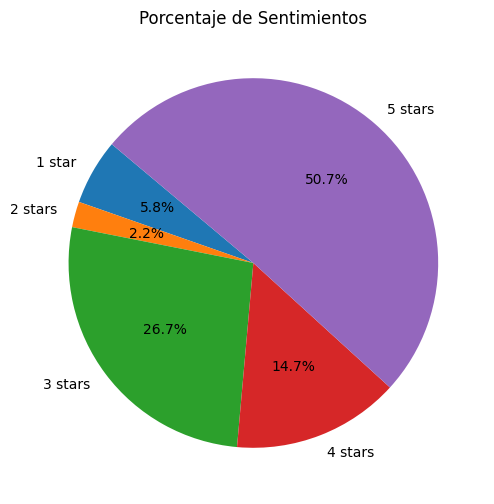

In [42]:
df['Sentimiento_Label'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    figsize=(6, 6),
    title='Porcentaje de Sentimientos'
)
plt.ylabel('')
plt.show()

**3. Gráfico de dispersión (Polaridad vs. Score)**

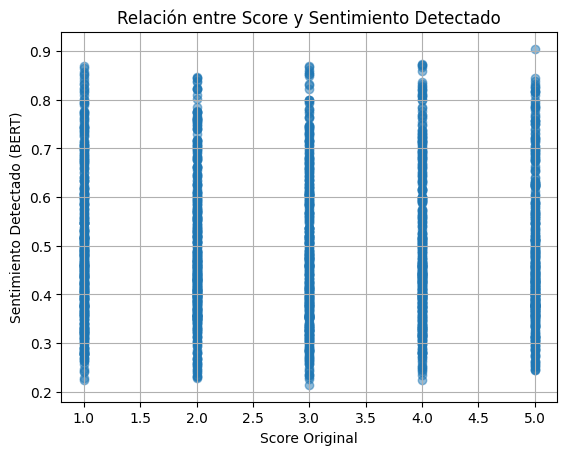

In [45]:
plt.scatter(df['Score'], df['Sentimiento_Score'], alpha=0.5)
plt.title('Relación entre Score y Sentimiento Detectado')
plt.xlabel('Score Original')
plt.ylabel('Sentimiento Detectado (BERT)')
plt.grid(True)
plt.show()

**4. WordCloud (Nube de palabras por sentimiento)**

In [46]:
!pip install -q wordcloud


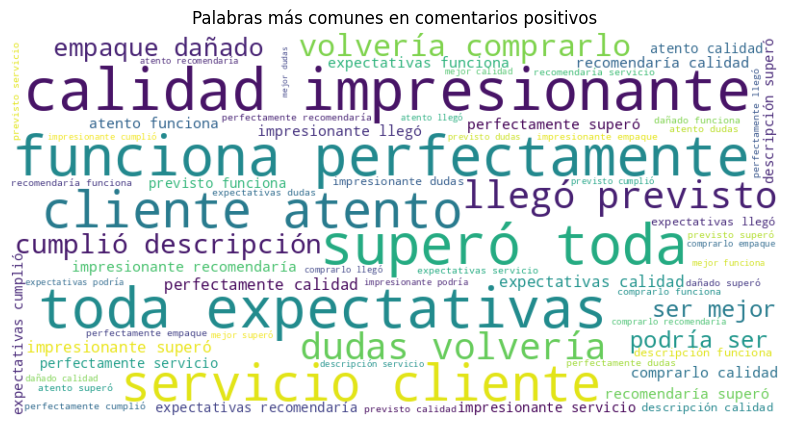

In [48]:
from wordcloud import WordCloud

# Generar WordCloud solo para comentarios positivos
textos_positivos = " ".join(df[df['Sentimiento_Label'] == '5 stars']['Texto_Limpio'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(textos_positivos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Palabras más comunes en comentarios positivos")
plt.show()

**Análisis por Score original**

Relaciona el Score original (de 1 a 5 estrellas) con el sentimiento detectado:

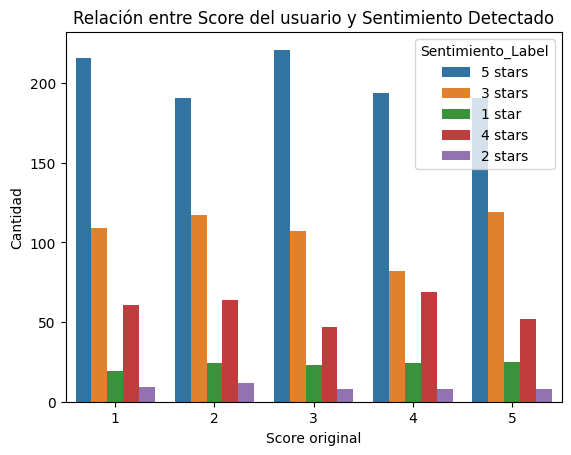

In [51]:
import seaborn as sns

sns.countplot(data=df, x='Score', hue='Sentimiento_Label')
plt.title("Relación entre Score del usuario y Sentimiento Detectado")
plt.xlabel("Score original")
plt.ylabel("Cantidad")
plt.show()

**Palabras clave por tipo de sentimiento**

In [61]:
from collections import Counter
import pandas as pd

# Palabras más frecuentes en comentarios positivos
positivos = df[df['Sentimiento_Label'] == '5 stars']['Texto_Limpio'].str.cat(sep=' ').split()
palabras_frecuentes_pos = Counter(positivos).most_common(10)

# Palabras más frecuentes en comentarios negativos
negativos = df[df['Sentimiento_Label'] == '1 star']['Texto_Limpio'].str.cat(sep=' ').split()
palabras_frecuentes_neg = Counter(negativos).most_common(10)

# Crear DataFrame para positivos
df_pos = pd.DataFrame(palabras_frecuentes_pos, columns=['Palabra', 'Frecuencia'])
df_pos.index = df_pos.index + 1
df_pos.columns.name = 'Comentarios Positivos'

# Crear DataFrame para negativos
df_neg = pd.DataFrame(palabras_frecuentes_neg, columns=['Palabra', 'Frecuencia'])
df_neg.index = df_neg.index + 1
df_neg.columns.name = 'Comentarios Negativos'

# Mostrar ambos
print("Palabras más comunes en comentarios POSITIVOS:")
display(df_pos)

print("Palabras más comunes en comentarios NEGATIVOS:")
display(df_neg)


Palabras más comunes en comentarios POSITIVOS:


Comentarios Positivos,Palabra,Frecuencia
1,superó,454
2,toda,454
3,expectativas,454
4,funciona,416
5,perfectamente,416
6,calidad,374
7,impresionante,374
8,dudas,349
9,volvería,349
10,comprarlo,349


Palabras más comunes en comentarios NEGATIVOS:


Comentarios Negativos,Palabra,Frecuencia
1,recomendaría,143
2,cumplió,139
3,descripción,139
4,empaque,122
5,dañado,122
6,llegó,116
7,previsto,116
8,dudas,95
9,volvería,95
10,comprarlo,95


**Clasificación simplificada**

In [55]:
def simplificar_sentimiento(etiqueta):
    if etiqueta in ['1 star', '2 stars']:
        return 'Negativo'
    elif etiqueta == '3 stars':
        return 'Neutro'
    else:
        return 'Positivo'

df['Sentimiento_Simple'] = df['Sentimiento_Label'].apply(simplificar_sentimiento)

**Mostrar distribución de sentimientos simplificados**

In [57]:
df['Sentimiento_Simple'].value_counts()


,count
Sentimiento_Simple,
Positivo,1306
Neutro,534
Negativo,160


**Visualizar con gráfico de barras**

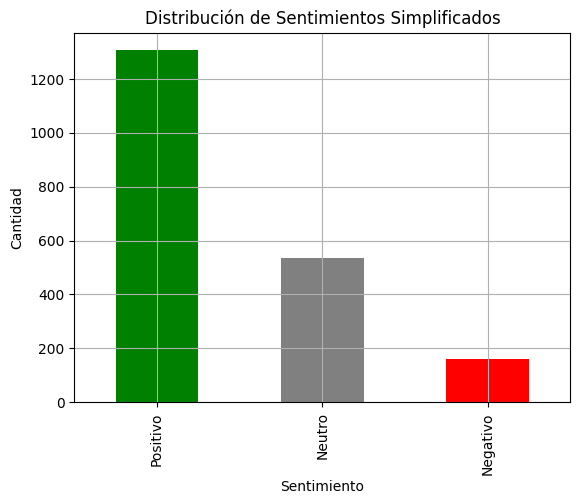

In [56]:
import matplotlib.pyplot as plt

df['Sentimiento_Simple'].value_counts().plot(
    kind='bar',
    color=['green', 'gray', 'red'],
    title='Distribución de Sentimientos Simplificados'
)
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()